1) ID number

2) Diagnosis (M = malignant, B = benign)

3-32)


Ten real-valued features are computed for each cell nucleus:

a) radius (média das distâncias do centro aos pontos no perímetro)

b) texture (desvio padrão dos valores de escala de cinza)

c) perimeter

d) area

e) smoothness (variação local nos comprimentos dos raios )

f) compactness (perímetro^2 / área - 1,0)

g) concavity (severidade das porções côncavas do contorno)

h) concave points (número de porções côncavas do contorno)

i) symmetry

j) fractal dimension (("aproximação da linha costeira" - 1)

A média, o erro padrão e o "pior" ou maior (média dos três
maiores valores) dessas características foram computados para cada imagem,
resultando em 30 características. Por exemplo, o campo 3 é o raio médio, o campo
13 é o raio SE, o campo 23 é o pior raio.

Class distribution: (1)-357 benign, (0)-212 malignant

#**ANÁLISE EXPLORATÓRIA**

### **Importando os dados:**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# desabilita os warnings
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
X = pd.read_csv("X.csv")

In [3]:
y = pd.read_csv("y.csv")

**Vamos concatenar os dados para melhor análise:**

In [4]:
frames = [X, y]

In [5]:
df = pd.concat(frames, axis=1)
df.rename(columns={"0": "result"}, inplace=True)

In [6]:
df

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst,result
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,186.0000,275.0000,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,243.0000,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,173.00000,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,198.00000,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,205.00000,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,111.00000,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,141.00000,0.21130,0.4107,0.2216,206.0000,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,144.00000,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,159.0000,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,277.00000,0.35140,152.00000,0.2397,0.07016,...,39.42,184.60,1821.0,165.00000,0.86810,0.9387,265.0000,0.4087,124.00000,0


### **Verificando se há dados nulos e correlações entre as Features:**

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0    radius_mean              569 non-null    float64
 1    texture_mean             569 non-null    float64
 2    perimeter_mean           569 non-null    float64
 3    area_mean                569 non-null    float64
 4    smoothness_mean          569 non-null    float64
 5    compactness_mean         569 non-null    float64
 6    concavity_mean           569 non-null    float64
 7   concave_points_mean       569 non-null    float64
 8    symmetry_mean            569 non-null    float64
 9    fractal_dimension_mean   569 non-null    float64
 10   radius_se                569 non-null    float64
 11   texture_se               569 non-null    float64
 12   perimeter_se             569 non-null    float64
 13   area_se                  569 non-null    float64
 14   smoothnes

In [8]:
df.isna().sum()

 radius_mean                0
 texture_mean               0
 perimeter_mean             0
 area_mean                  0
 smoothness_mean            0
 compactness_mean           0
 concavity_mean             0
concave_points_mean         0
 symmetry_mean              0
 fractal_dimension_mean     0
 radius_se                  0
 texture_se                 0
 perimeter_se               0
 area_se                    0
 smoothness_se              0
 compactness_se             0
 concavity_se               0
 concave_points_se          0
 symmetry_se                0
 fractal_dimension_se       0
 radius_worst               0
 texture_worst              0
 perimeter_worst            0
 area_worst                 0
 smoothness_worst           0
 compactness_worst          0
 concavity_worst            0
 concave_points_worst       0
 symmetry_worst             0
 fractal_dimension_worst    0
result                      0
dtype: int64

### **Detalhando as correlações:**

In [9]:
df.corr()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst,result
radius_mean,1.000000,-0.099840,-0.386753,-0.319166,0.029797,-0.050406,-0.002002,-0.041176,0.059780,-0.031360,...,-0.115969,-0.347007,-0.278298,0.024718,-0.017172,0.005269,-0.012441,-0.036770,-0.036936,0.218766
texture_mean,-0.099840,1.000000,0.329533,0.321086,0.033670,0.140073,0.054148,0.082132,-0.032590,-0.094817,...,0.912045,0.358040,0.343546,-0.005302,0.034215,0.031426,0.059725,-0.064752,0.019585,-0.415185
perimeter_mean,-0.386753,0.329533,1.000000,0.986507,0.105892,0.098709,0.155419,0.215696,-0.097831,-0.024489,...,0.303038,0.970387,0.941550,0.000419,0.023235,0.058499,0.185364,0.086627,0.027304,-0.742636
area_mean,-0.319166,0.321086,0.986507,1.000000,0.107286,0.076765,0.151664,0.215024,-0.096938,-0.028365,...,0.287489,0.959120,0.959213,-0.002280,0.010010,0.055673,0.183860,0.083427,0.008054,-0.708984
smoothness_mean,0.029797,0.033670,0.105892,0.107286,1.000000,-0.034976,0.014554,0.043158,0.001686,-0.022084,...,0.037551,0.125642,0.128621,0.016403,-0.051672,0.026080,0.030205,0.022975,-0.025747,-0.128880
compactness_mean,-0.050406,0.140073,0.098709,0.076765,-0.034976,1.000000,0.103352,0.178646,0.006421,-0.019556,...,0.129648,0.125386,0.088754,0.075275,-0.036373,0.063028,0.083746,0.039552,0.192826,-0.099244
concavity_mean,-0.002002,0.054148,0.155419,0.151664,0.014554,0.103352,1.000000,0.066535,-0.019557,-0.023116,...,0.051821,0.151919,0.144454,-0.008968,0.030513,0.256058,0.090931,-0.042144,-0.026531,-0.132225
concave_points_mean,-0.041176,0.082132,0.215696,0.215024,0.043158,0.178646,0.066535,1.000000,-0.044912,-0.016021,...,0.052106,0.203744,0.197594,0.072517,-0.036878,-0.032678,0.080438,-0.047359,0.123428,-0.141168
symmetry_mean,0.059780,-0.032590,-0.097831,-0.096938,0.001686,0.006421,-0.019557,-0.044912,1.000000,-0.034609,...,-0.050247,-0.100861,-0.100657,-0.046680,0.024209,0.083441,0.099551,-0.004926,-0.040480,0.077920
fractal_dimension_mean,-0.031360,-0.094817,-0.024489,-0.028365,-0.022084,-0.019556,-0.023116,-0.016021,-0.034609,1.000000,...,-0.100771,-0.040124,-0.043344,-0.031295,-0.028818,-0.001437,-0.024388,0.055950,-0.014295,0.045698


**Correlação de Pearson:**

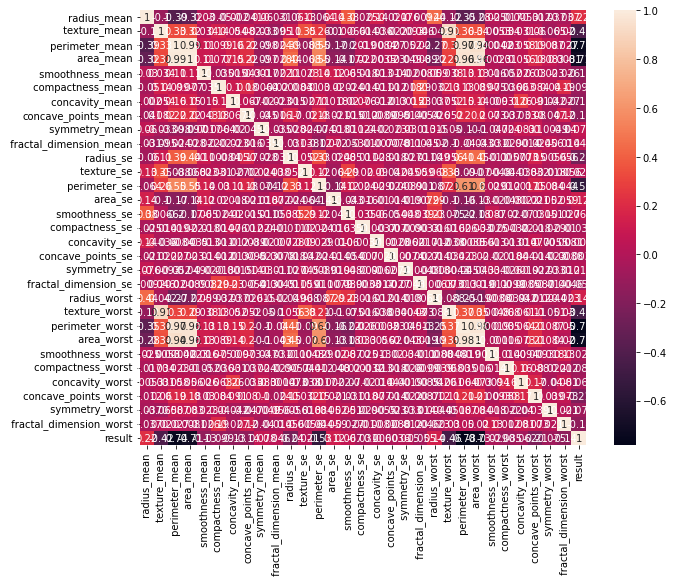

In [10]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True);

**Correlação de Spearman:**

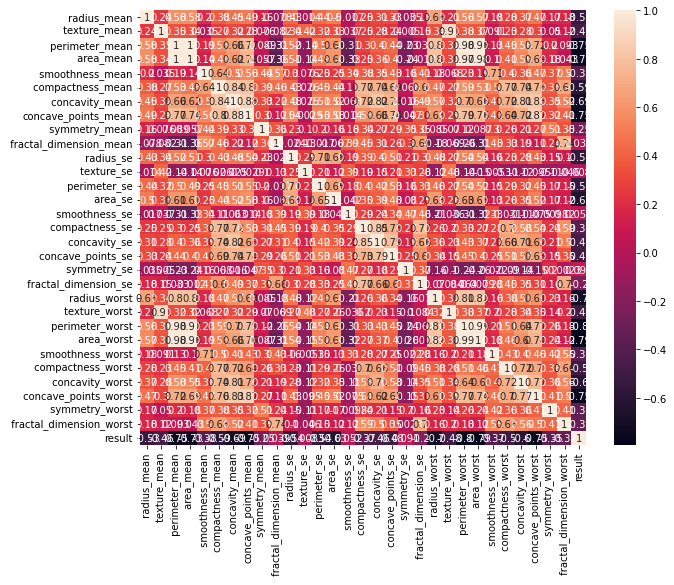

In [11]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr("spearman"), annot=True);

In [12]:
df

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst,result
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,186.0000,275.0000,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,243.0000,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,173.00000,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,198.00000,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,205.00000,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,111.00000,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,141.00000,0.21130,0.4107,0.2216,206.0000,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,144.00000,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,159.0000,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,277.00000,0.35140,152.00000,0.2397,0.07016,...,39.42,184.60,1821.0,165.00000,0.86810,0.9387,265.0000,0.4087,124.00000,0


### **Intervalo de confiança - Média das áreas**

**Nível de confiança = 95%**

Iremos pegar 50 amostras de forma aleatória:

In [13]:
import random
lista = []
for num in df[" area_mean"]:
  lista.append(num)
dados = random.sample(lista,50)

Média amostral:

In [14]:
media = pd.DataFrame(dados).mean()
media = media[0]
media

677.802

Desvio padrão amostral:

In [15]:
desvio_padrao = pd.DataFrame(dados).std()
desvio_padrao  = desvio_padrao[0]
desvio_padrao 

376.6828940222526

Número de amostras:

In [16]:
n = len(dados)
n

50

In [17]:
from scipy.stats import norm
from scipy import stats
import math

In [18]:
stats.sem(dados)

53.271005744021686

In [19]:
intervalos = norm.interval(0.95, media, stats.sem(dados))
intervalos

(573.3927473214911, 782.2112526785089)

In [20]:
margem_erro = media - intervalos[0]
margem_erro

104.40925267850889

In [23]:
print(f"Temos 95% de confiança que a média aritmética da média das áreas estará entre {intervalos[0]:.2f} e {intervalos[1]:.2f} com uma margem de erro de {margem_erro:.2f} para mais e para menos")

Temos 95% de confiança que a média aritmética da média das áreas estará entre 573.39 e 782.21 com uma margem de erro de 104.41 para mais e para menos


**De fato confirmamos abaixo que a média geral está dentro do intervalo:**

In [24]:
df[" area_mean"].mean()

654.8891036906855

### **Avaliando os quartis da média das áreas:**

In [25]:

Q1 = df[" area_mean"].quantile(q=0.25) # Primeiro quartil
Q2 = df[" area_mean"].quantile(q=0.50) # Segundo quartil
Q3 = df[" area_mean"].quantile(q=0.75) # Terceiro quartil

IQR = Q3 - Q1 # Intervalo interquartílico
inf = Q1 - 1.5 * IQR
sup = Q3 + 1.5 * IQR
media = df[" area_mean"].mean()
mediana = df[" area_mean"].median()
moda = df[" area_mean"].value_counts().index[0]

print(f"Primeiro quartil: {Q1}")
print(f"Segundo quartil: {Q2}")
print(f"Terceiro quartil: {Q3}")
print(f"Intervalo interquartílico: {IQR:.2f}")
print(f"Limite superior: {sup:.2f}")
print(f"Limite inferior: {inf:.2f}")
print(f"Média geral: {media:.2f}")
print(f"Mediana: {mediana:.2f}")
print(f"Moda-Valor mais frequente: {moda:.2f}")


Primeiro quartil: 420.3
Segundo quartil: 551.1
Terceiro quartil: 782.7
Intervalo interquartílico: 362.40
Limite superior: 1326.30
Limite inferior: -123.30
Média geral: 654.89
Mediana: 551.10
Moda-Valor mais frequente: 512.20


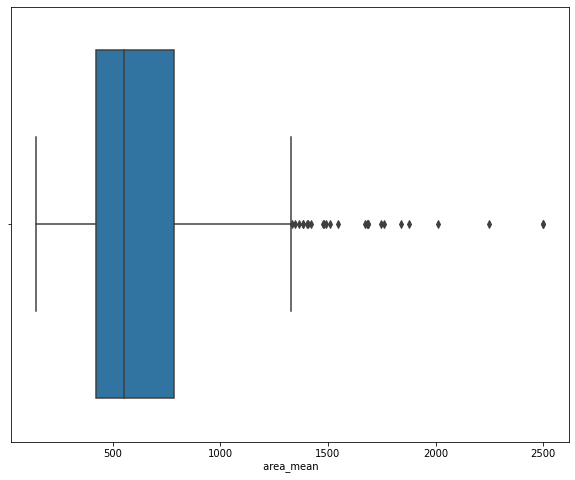

In [26]:
plt.figure(figsize=(10,8))
sns.boxplot(df[" area_mean"], hue=df["result"]);

### **Avaliando a assimetria e curtose -  positiva -  moda <= mediana <= média**

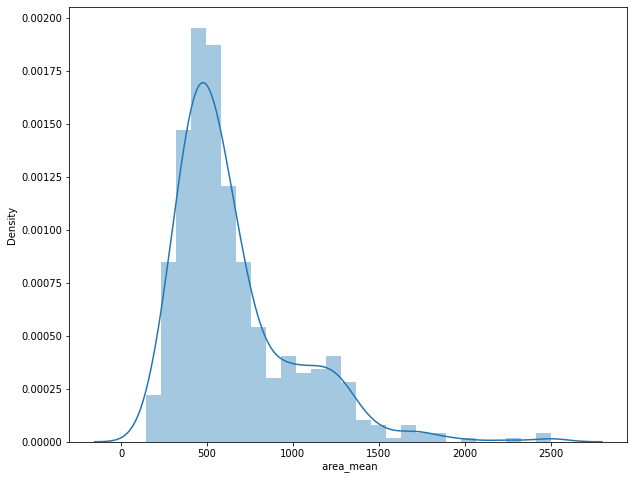

In [27]:
plt.figure(figsize=(10,8))
sns.distplot(df[" area_mean"]);

**Para valores abaixo de 0.263 => O resultado identificou como Leptocúrtica, mostrando que a maioria dos seus dados se dá em torno do seu centro:**

In [28]:
Q10 = df[" area_mean"].quantile(q=0.1) # Décimo quartil
Q90 = df[" area_mean"].quantile(q=0.9) # Nonagésimo quartil
(Q3-Q1)/(2*(Q90-Q10))

0.21173171301706012

###**Explorando o fator Radius**

**Proporção das células benígmas e malígnas:**

1=Benígma | 0=Malígna
1    0.627417
0    0.372583
Name: result, dtype: float64


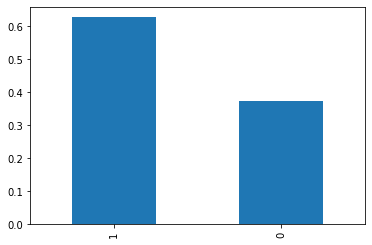

In [29]:
df["result"].value_counts(normalize=True).plot(kind="bar")
print("1=Benígma | 0=Malígna")
print(df["result"].value_counts(normalize=True))

**Menores e maiores valores do raio médio:**

In [30]:
lista1 = []
for i in df["result"]:
    if i not in lista1:
      lista1.append(i)
    else:
      continue
    for c in lista1:
      if c == 0:
        df_0 = df[df["result"] == c]
      else:
        df_1 = df[df["result"] == c]
min_radius_mean_0 = df_0[" radius_mean"].min()
max_radius_mean_0 = df_0[" radius_mean"].max()
min_radius_mean_1 = df_1[" radius_mean"].min()
max_radius_mean_1 = df_1[" radius_mean"].max()
#==================================================================================
print(f"O menor valor do raio médio das células malígnas é de {min_radius_mean_0}")
print(f"O maior valor do raio médio das células malígnas é de {max_radius_mean_0}")
print(f"O menor valor do raio médio das células benígnas é de {min_radius_mean_1}")
print(f"O maior valor do raio médio das células benígnas é de {max_radius_mean_1}")

O menor valor do raio médio das células malígnas é de 10.95
O maior valor do raio médio das células malígnas é de 28.11
O menor valor do raio médio das células benígnas é de 7.76
O maior valor do raio médio das células benígnas é de 9904.0


In [31]:
mean = df[" radius_mean"].mean()
print(f"A média aritmética da média dos raios é de {mean:.2f}")

A média aritmética da média dos raios é de 706.77


**Nota-se no gráfico abaixo que o valor médio do radius_mean (média) de células malígnas é discrepatemente menor do que o benígna e que todas as células malígnas tem sua média de raio abaixo da média geral aritmética:**

**Podemos perceber que o raio médio de uma célula com câncer malígno é reduzida de forma expressiva e, consequentemente sua área.**

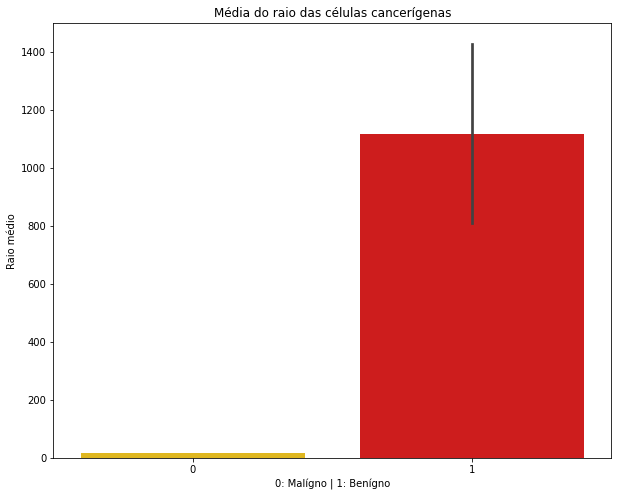

In [32]:
plt.figure(figsize=(10, 8))
sns.barplot(data=df, x="result", y=" radius_mean", palette="hot_r")
plt.title("Média do raio das células cancerígenas")
plt.xlabel("0: Malígno | 1: Benígno")
plt.ylabel("Raio médio"); 

In [33]:
mean_se = df[" radius_se"].mean()
print(f"A média aritmética da média do erro padrão dos raios é de {mean_se:.2f}")

A média aritmética da média do erro padrão dos raios é de 77.14


**Nota-se no gráfico abaixo que o valor médio do radius_se (erro padrão - variação da média da população) malígno é discrepatemente maior do que o benígno e que todas as células malígnas tem sua média de erro padrão acima da média geral aritmética:****

**Conclui-se que em cada célula malígna há uma variação enorme do seu raio médio.**

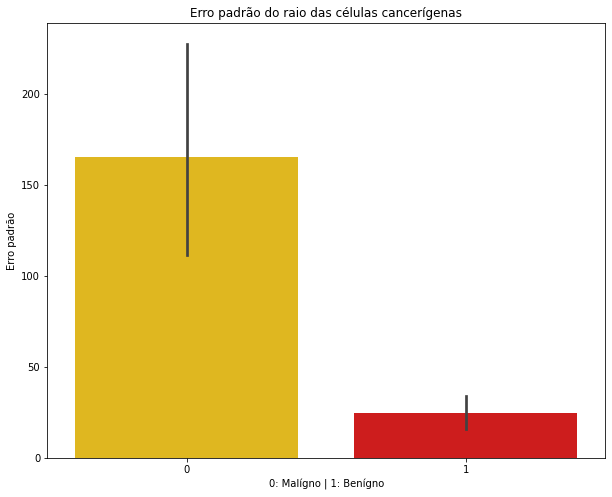

In [34]:
plt.figure(figsize=(10, 8))
sns.barplot(data=df, x="result", y=" radius_se", palette="hot_r")
plt.title("Erro padrão do raio das células cancerígenas")
plt.xlabel("0: Malígno | 1: Benígno")
plt.ylabel("Erro padrão");

In [35]:
mean_w = df[" radius_worst"].mean()
print(f"A média aritmética da menor valor dos raios é de {mean_w:.2f}")

A média aritmética da menor valor dos raios é de 315.19


**Nota-se no gráfico abaixo que o valor médio do radius_worst (menor valor de raio de cada célula )malígno é discrepatemente menor do que o benígno**

**Em cada célula malígna o menor valor de raio é menor do que a média do pior valor dos raios**

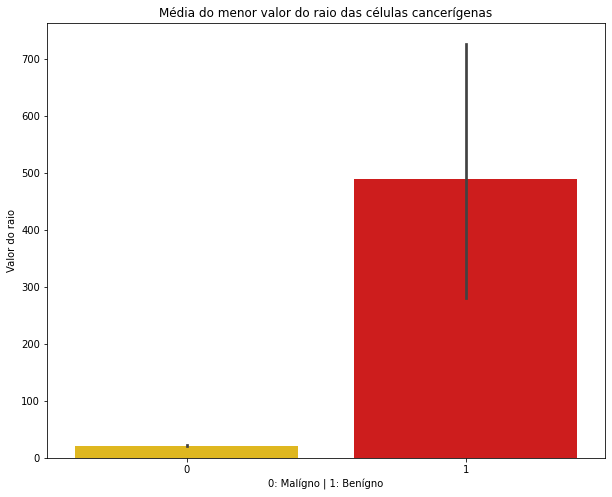

In [36]:
plt.figure(figsize=(10, 8))
sns.barplot(data=df, x="result", y=" radius_worst", palette="hot_r")
plt.title("Média do menor valor do raio das células cancerígenas")
plt.xlabel("0: Malígno | 1: Benígno")
plt.ylabel("Valor do raio");

**Vamos dividir os valores das features em classes para uma melhor visualização dos valores:**

In [37]:
df_class = pd.DataFrame()
df["radius_mean_class"] = pd.cut(x=df[" radius_mean"], bins = 10, right=True)
df["radius_se_class"] = pd.cut(x=df[" radius_se"], bins = 10, right=True)
df["radius_worst_class"] = pd.cut(x=df[" radius_worst"], bins = 10, right=True)

In [38]:
df["radius_mean_class"].value_counts()

(-2.136, 997.384]       526
(8914.376, 9904.0]       29
(7924.752, 8914.376]     11
(6935.128, 7924.752]      3
(997.384, 1987.008]       0
(1987.008, 2976.632]      0
(2976.632, 3966.256]      0
(3966.256, 4955.88]       0
(4955.88, 5945.504]       0
(5945.504, 6935.128]      0
Name: radius_mean_class, dtype: int64

In [39]:
df[df[" radius_mean"] < 1000]["result"].value_counts()

1    314
0    212
Name: result, dtype: int64

**Vejamos abaixo que todas as células com raio médio acima de 997.384 são benígnas e todas as células malígnas tem raio médio abaixo deste valor, mas deixemos claro que nem todas abaixo deste valor são malígnas, 314 das 526 células são benígnas, apenas afirmo que 100% das células com raio acima de 997.384 são benígnas e que 100% das malígnas estão abaixo.**

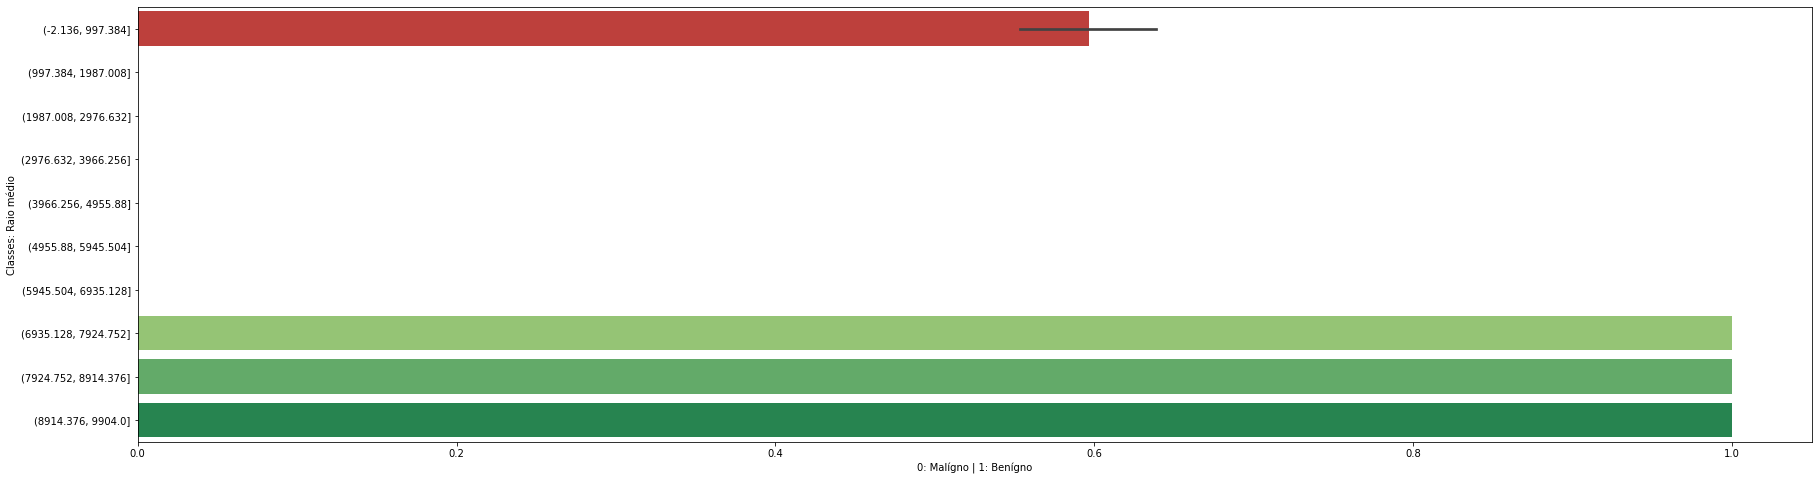

In [40]:
plt.figure(figsize=(30, 8))
sns.barplot(data=df, y="radius_mean_class", x="result", palette="RdYlGn")
plt.xlabel("0: Malígno | 1: Benígno")
plt.ylabel("Classes: Raio médio");

**Nota-se como é desproporcional a relação da radius_mean X radius_worst das células benígnas e malígnas, todas as malígnas estão concentradas em um mínimo intervalo:**

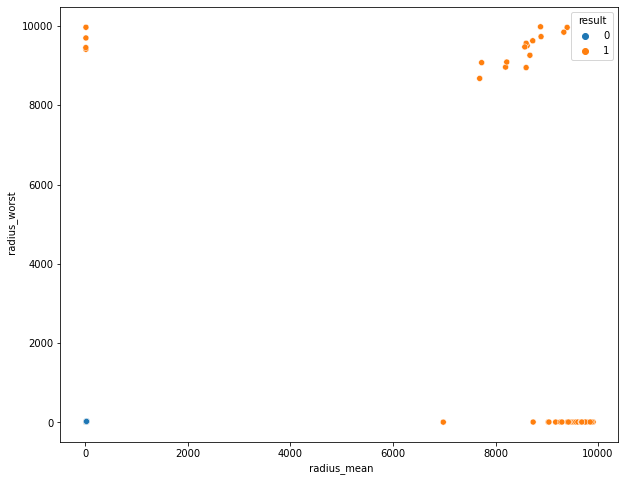

In [41]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x=" radius_mean", y=" radius_worst", hue="result");

**Percebemos a diferença do radius_se X radius_mean das células malígnas em relação as células benígnas, todas as malígnas estão concentradas em intervalos com valores de "erro padrão" altos:**

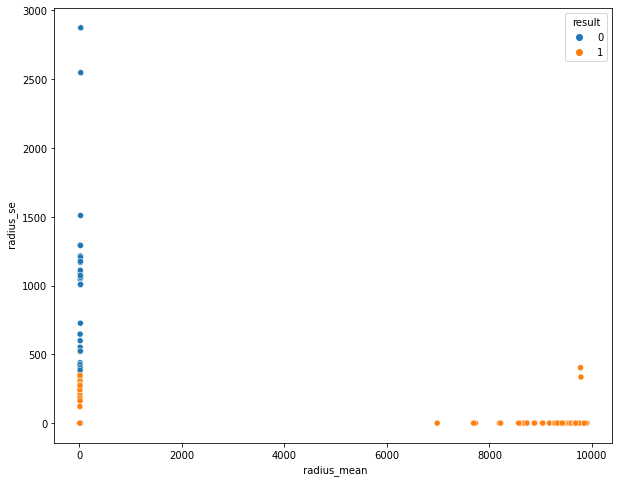

In [42]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x=" radius_mean", y=" radius_se", hue="result");   

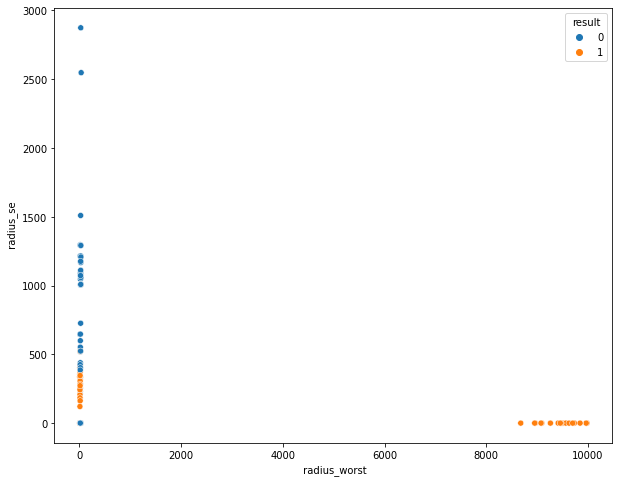

In [43]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x=" radius_worst", y=" radius_se", hue="result");   

###**Explorando o fator texture**

In [44]:
lista1 = []
for i in df["result"]:
    if i not in lista1:
      lista1.append(i)
    else:
      continue
    for c in lista1:
      if c == 0:
        df_0 = df[df["result"] == c]
      else:
        df_1 = df[df["result"] == c]
min_text_mean_0 = df_0[" texture_mean"].min()
max_text_mean_0 = df_0[" texture_mean"].max()
min_text_mean_1 = df_1[" texture_mean"].min()
max_text_mean_1 = df_1[" texture_mean"].max()
#==================================================================================
print(f"O menor valor médio do erro padrão das células malígnas é de {min_text_mean_0}")
print(f"O maior valor médio do erro padrão das células malígnas é de {max_text_mean_0}")
print(f"O menor valor médio do erro padrão das células benígnas é de {min_text_mean_1}")
print(f"O maior valor médio do erro padrão das células benígnas é de {max_text_mean_1}")

O menor valor médio do erro padrão das células malígnas é de 10.38
O maior valor médio do erro padrão das células malígnas é de 39.28
O menor valor médio do erro padrão das células benígnas é de 9.71
O maior valor médio do erro padrão das células benígnas é de 33.81


In [45]:
mean_text_se = df[" texture_mean"].mean()
print(f"O erro padrão das texturas das células cancerígenas é de {mean_text_se:.2f}")

O erro padrão das texturas das células cancerígenas é de 19.29


**O erro padrão (variação da média do valor das texturas) da células malígnas novamente deu maior do que das células benígmas, vamos confirmar durante a análise exploratória se é para todas as Features principais.**

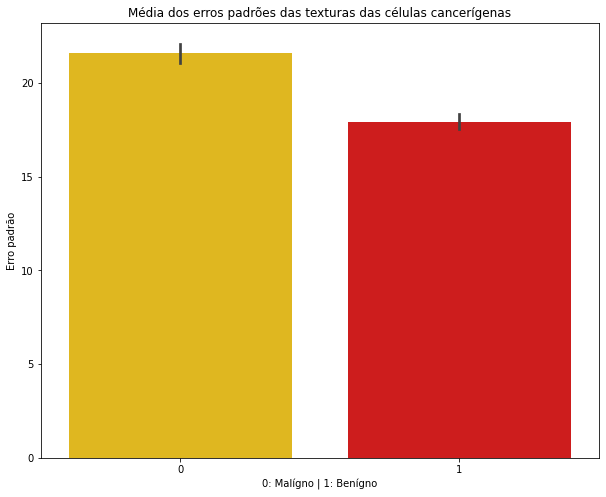

In [46]:
plt.figure(figsize=(10, 8))
sns.barplot(data=df, x="result", y=" texture_mean", palette="hot_r")
plt.title("Média dos erros padrões das texturas das células cancerígenas")
plt.xlabel("0: Malígno | 1: Benígno")
plt.ylabel("Erro padrão"); 

In [47]:
mean_text_se = df[" texture_se"].mean()
print(f"O erro desvio padrão dos valores das texturas das células cancerígenas é de {mean_text_se:.2f}")

O erro desvio padrão dos valores das texturas das células cancerígenas é de 825.49


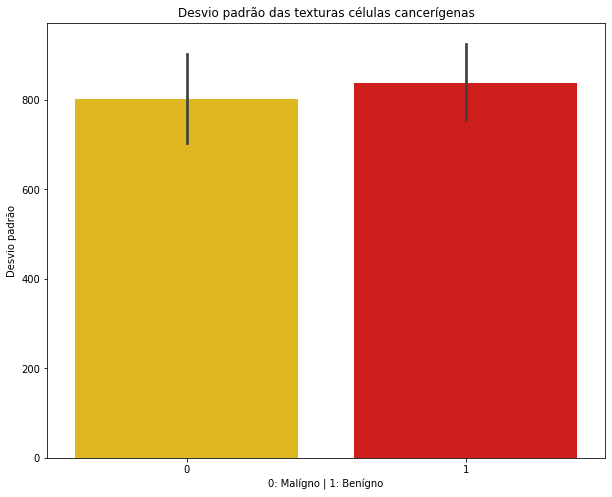

In [48]:
plt.figure(figsize=(10, 8))
sns.barplot(data=df, x="result", y=" texture_se", palette="hot_r")
plt.title("Desvio padrão das texturas células cancerígenas")
plt.xlabel("0: Malígno | 1: Benígno")
plt.ylabel("Desvio padrão"); 

In [49]:
mean_text_worst = df[" texture_worst"].mean()
print(f"A média do menor valor da textura das células cancerígenas é de {mean_text_worst:.2f}")

A média do menor valor da textura das células cancerígenas é de 25.68


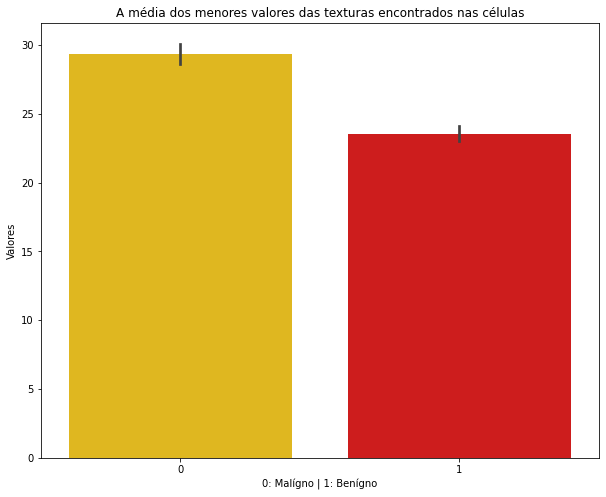

In [50]:
plt.figure(figsize=(10, 8))
sns.barplot(data=df, x="result", y=" texture_worst", palette="hot_r")
plt.title("A média dos menores valores das texturas encontrados nas células")
plt.xlabel("0: Malígno | 1: Benígno")
plt.ylabel("Valores"); 

In [51]:
df

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,...,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst,result,radius_mean_class,radius_se_class,radius_worst_class
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0,"(-2.136, 997.384]","(861.978, 1149.267]","(-2.043, 1005.237]"
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,0.12380,0.18660,0.2416,186.0000,275.0000,0.08902,0,"(-2.136, 997.384]","(-2.761, 287.4]","(-2.043, 1005.237]"
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,0.14440,0.42450,0.4504,243.0000,0.3613,0.08758,0,"(-2.136, 997.384]","(-2.761, 287.4]","(-2.043, 1005.237]"
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,0.20980,0.86630,0.6869,0.2575,0.6638,173.00000,0,"(-2.136, 997.384]","(-2.761, 287.4]","(-2.043, 1005.237]"
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,198.00000,0.10430,0.1809,0.05883,...,0.13740,205.00000,0.4000,0.1625,0.2364,0.07678,0,"(-2.136, 997.384]","(-2.761, 287.4]","(-2.043, 1005.237]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,111.00000,0.11590,0.24390,0.13890,0.1726,0.05623,...,141.00000,0.21130,0.4107,0.2216,206.0000,0.07115,0,"(-2.136, 997.384]","(1149.267, 1436.556]","(-2.043, 1005.237]"
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,144.00000,0.09791,0.1752,0.05533,...,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0,"(-2.136, 997.384]","(-2.761, 287.4]","(-2.043, 1005.237]"
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,159.0000,0.05648,...,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0,"(-2.136, 997.384]","(-2.761, 287.4]","(-2.043, 1005.237]"
567,20.60,29.33,140.10,1265.0,0.11780,277.00000,0.35140,152.00000,0.2397,0.07016,...,165.00000,0.86810,0.9387,265.0000,0.4087,124.00000,0,"(-2.136, 997.384]","(574.689, 861.978]","(-2.043, 1005.237]"


###**Explorando o fator perimeter**

In [52]:
lista1 = []
for i in df["result"]:
    if i not in lista1:
      lista1.append(i)
    else:
      continue
    for c in lista1:
      if c == 0:
        df_0 = df[df["result"] == c]
      else:
        df_1 = df[df["result"] == c]
min_perimeter_mean_0 = df_0[" perimeter_mean"].min()
max_perimeter_mean_0 = df_0[" perimeter_mean"].max()
min_perimeter_mean_1 = df_1[" perimeter_mean"].min()
max_perimeter_mean_1 = df_1[" perimeter_mean"].max()
#==================================================================================
print(f"O menor valor médio do perímetro das células malígnas é de {min_perimeter_mean_0}")
print(f"O maior valor médio do perímetro das células malígnas é de {max_perimeter_mean_0}")
print(f"O menor valor médio do perímetro das células benígnas é de {min_perimeter_mean_1}")
print(f"O maior valor médio do perímetro das células benígnas é de {max_perimeter_mean_1}")

O menor valor médio do perímetro das células malígnas é de 71.9
O maior valor médio do perímetro das células malígnas é de 188.5
O menor valor médio do perímetro das células benígnas é de 43.79
O maior valor médio do perímetro das células benígnas é de 114.6


In [53]:
mean_perimeter = df[" perimeter_mean"].mean()
print(f"A média dos perímetros das células cancerígenas é de {mean_perimeter:.2f}")

A média dos perímetros das células cancerígenas é de 91.97


**Apesar do raio médio das células malígnas serem menores do que as malígnas o perímetro das células malígnas é maior.**

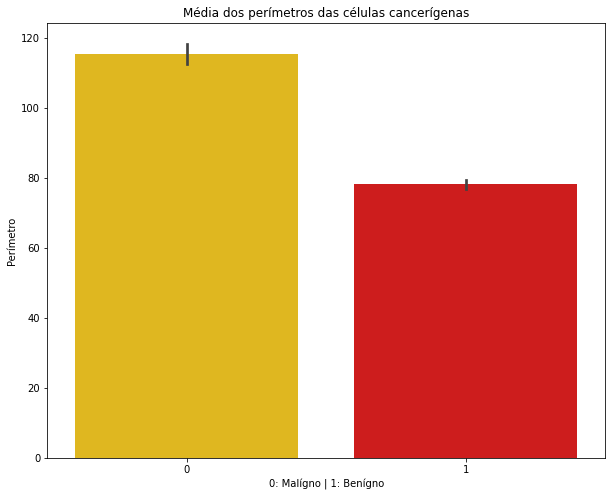

In [54]:
plt.figure(figsize=(10, 8))
sns.barplot(data=df, x="result", y=" perimeter_mean", palette="hot_r")
plt.title("Média dos perímetros das células cancerígenas")
plt.xlabel("0: Malígno | 1: Benígno")
plt.ylabel("Perímetro"); 

In [55]:
mean_perimeter_se = df[" texture_se"].mean()
print(f"A média do erro padrão dos valores das texturas das células cancerígenas é de {mean_perimeter_se:.2f}")

A média do erro padrão dos valores das texturas das células cancerígenas é de 825.49


**O gráfico abaixo mostra uma maior média na variação no perímetro das células malígnas:**

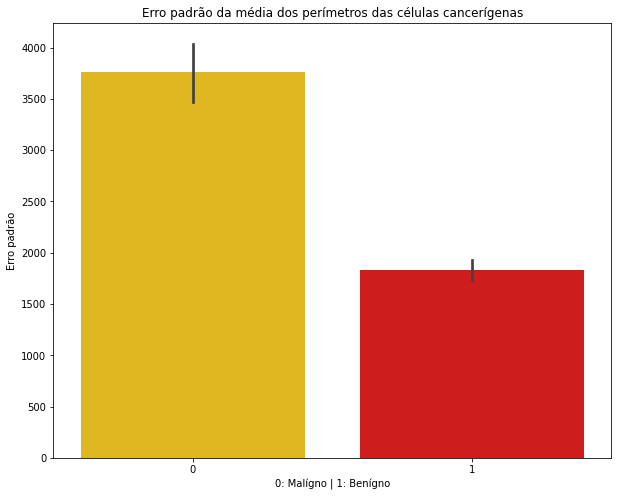

In [56]:
plt.figure(figsize=(10, 8))
sns.barplot(data=df, x="result", y=" perimeter_se", palette="hot_r")
plt.title("Erro padrão da média dos perímetros das células cancerígenas")
plt.xlabel("0: Malígno | 1: Benígno")
plt.ylabel("Erro padrão"); 

In [57]:
mean_text_worst = df[" perimeter_worst"].mean()
print(f"A média do menor valor dos perímetros das células cancerígenas é de {mean_text_worst:.2f}")

A média do menor valor dos perímetros das células cancerígenas é de 107.26


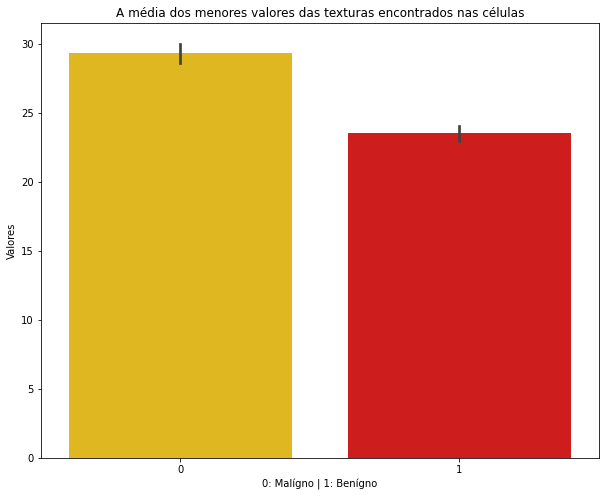

In [58]:
plt.figure(figsize=(10, 8))
sns.barplot(data=df, x="result", y=" texture_worst", palette="hot_r")
plt.title("A média dos menores valores das texturas encontrados nas células")
plt.xlabel("0: Malígno | 1: Benígno")
plt.ylabel("Valores"); 

###**Explorando o fator area**

In [59]:
df.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,...,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst,result,radius_mean_class,radius_se_class,radius_worst_class
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0,"(-2.136, 997.384]","(861.978, 1149.267]","(-2.043, 1005.237]"
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,0.1238,0.1866,0.2416,186.0000,275.0000,0.08902,0,"(-2.136, 997.384]","(-2.761, 287.4]","(-2.043, 1005.237]"
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,0.1444,0.4245,0.4504,243.0000,0.3613,0.08758,0,"(-2.136, 997.384]","(-2.761, 287.4]","(-2.043, 1005.237]"
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,0.2098,0.8663,0.6869,0.2575,0.6638,173.00000,0,"(-2.136, 997.384]","(-2.761, 287.4]","(-2.043, 1005.237]"
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,198.0000,0.10430,0.1809,0.05883,...,0.1374,205.0000,0.4000,0.1625,0.2364,0.07678,0,"(-2.136, 997.384]","(-2.761, 287.4]","(-2.043, 1005.237]"


In [60]:
lista1 = []
for i in df["result"]:
    if i not in lista1:
      lista1.append(i)
    else:
      continue
    for c in lista1:
      if c == 0:
        df_0 = df[df["result"] == c]
      else:
        df_1 = df[df["result"] == c]
min_area_mean_0 = df_0[" area_mean"].min()
max_area_mean_0 = df_0[" area_mean"].max()
min_area_mean_1 = df_1[" area_mean"].min()
max_area_mean_1 = df_1[" area_mean"].max()
#==================================================================================
print(f"O menor valor da área das células malígnas é de {min_area_mean_0}")
print(f"O maior valor da área das células malígnas é de {max_area_mean_0}")
print(f"O menor valor da área das células benígnas é de {min_area_mean_1}")
print(f"O maior valor da área das células benígnas é de {max_area_mean_1}")

O menor valor da área das células malígnas é de 361.6
O maior valor da área das células malígnas é de 2501.0
O menor valor da área das células benígnas é de 143.5
O maior valor da área das células benígnas é de 992.1


In [61]:
mean_perimeter = df[" area_mean"].mean()
print(f"A média das áreass das células cancerígenas é de {mean_perimeter:.2f}")

A média das áreass das células cancerígenas é de 654.89


**Apesar do raio médio das células malígnas serem menores do que as malígnas o perímetro das células malígnas é maior.**

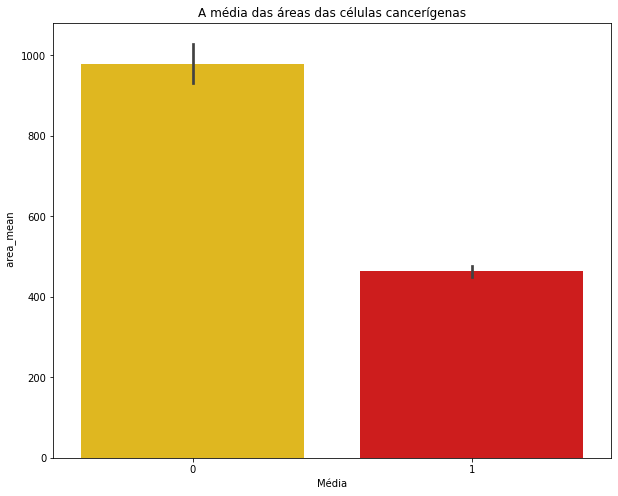

In [62]:
plt.figure(figsize=(10, 8))
sns.barplot(data=df, x="result", y=" area_mean", palette="hot_r")
plt.title("A média das áreas das células cancerígenas")
plt.xlabel("Média"); 

In [63]:
mean_area_se = df[" area_se"].mean()
print(f"A média do erro padrão dos valores das áreas das células cancerígenas é de {mean_area_se:.2f}")

A média do erro padrão dos valores das áreas das células cancerígenas é de 316.23


**O gráfico abaixo mostra uma maior média na variação no perímetro das células malígnas:**

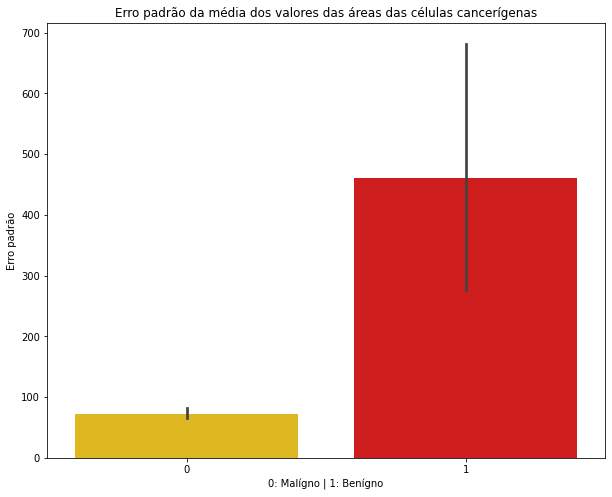

In [64]:
plt.figure(figsize=(10, 8))
sns.barplot(data=df, x="result", y=" area_se", palette="hot_r")
plt.title("Erro padrão da média dos valores das áreas das células cancerígenas")
plt.xlabel("0: Malígno | 1: Benígno")
plt.ylabel("Erro padrão"); 

In [65]:
mean_area_worst = df[" area_worst"].mean()
print(f"A média dos menores valores das áreas das células cancerígenas é de {mean_area_worst:.2f}")

A média dos menores valores das áreas das células cancerígenas é de 880.58


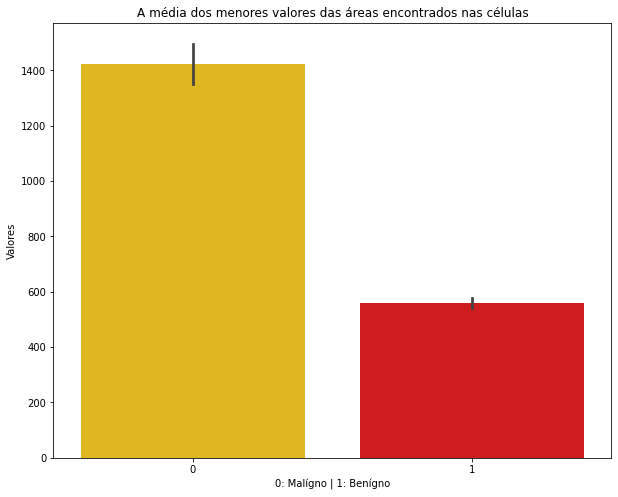

In [66]:
plt.figure(figsize=(10, 8))
sns.barplot(data=df, x="result", y=" area_worst", palette="hot_r")
plt.title("A média dos menores valores das áreas encontrados nas células")
plt.xlabel("0: Malígno | 1: Benígno")
plt.ylabel("Valores"); 

**Correlação entre as médias das 4 últimas Features analisadas:**

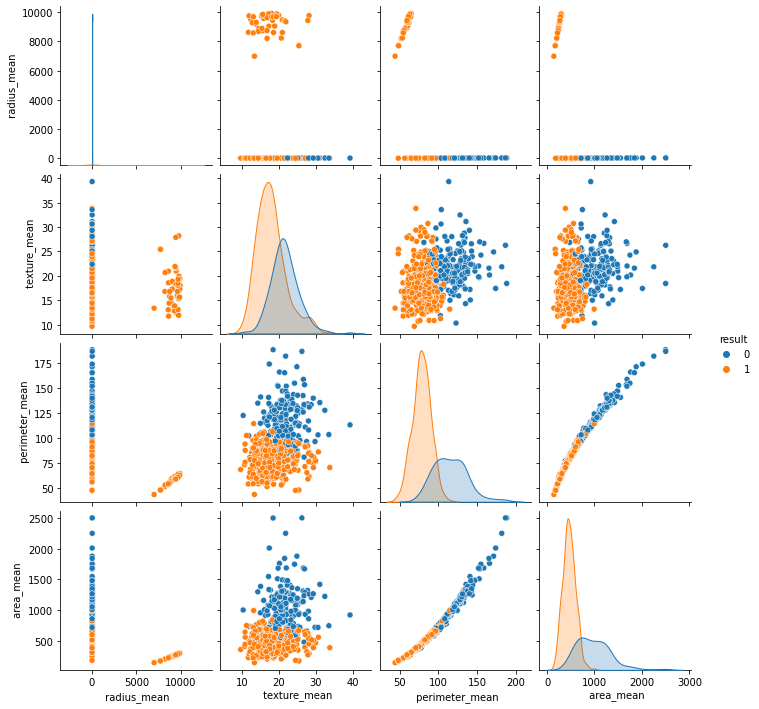

In [67]:
df_k = df[[" radius_mean", " texture_mean", " perimeter_mean", " area_mean", "result"]]
sns.pairplot(df_k, hue="result");